In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import fetch_california_housing

In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['PRICE'] = data.target

Dataset shape: (20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


FileNotFoundError: [Errno 2] No such file or directory: 'results/correlation_heatmap.png'

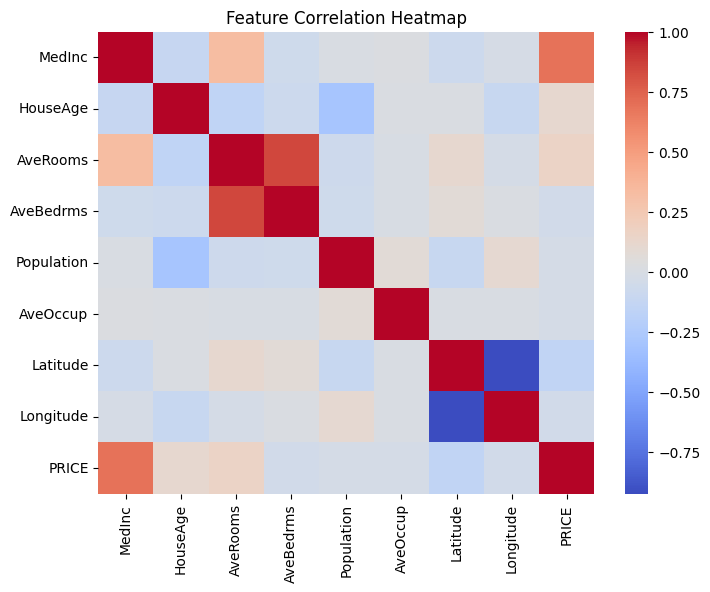

In [3]:
print("Dataset shape:", df.shape)
print(df.head())

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.savefig("results/correlation_heatmap.png")
plt.show()

In [4]:
X = df.drop("PRICE", axis=1)
y = df["PRICE"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
y_pred = model.predict(X_test)

R² Score: 0.5757877060324512
RMSE: 0.745581383012776


FileNotFoundError: [Errno 2] No such file or directory: 'results/actual_vs_predicted.png'

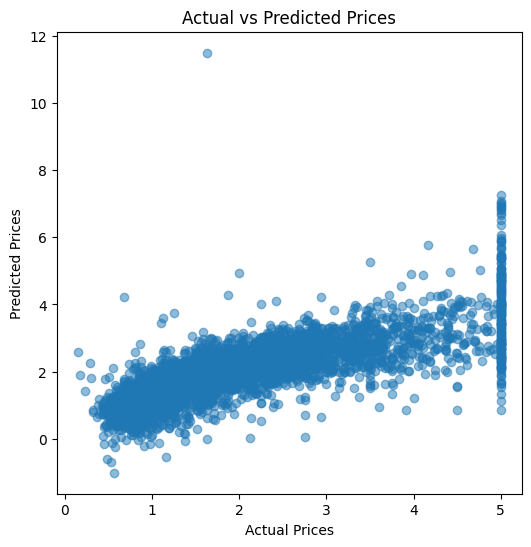

In [7]:
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Scatter plot (Actual vs Predicted)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.savefig("results/actual_vs_predicted.png")
plt.show()

In [8]:
print("First 5 Predictions:", y_pred[:5])
print("First 5 Actual:", list(y_test[:5]))

First 5 Predictions: [0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]
First 5 Actual: [0.477, 0.458, 5.00001, 2.186, 2.78]


In [9]:
import pickle

# Save model to disk
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)